In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

## QR Decomposition (4x2 matrix)

In [3]:
A = np.array([[2,0],
              [-1,1],
              [1,-1],
              [-1,-1]
            ])
A2 = A[:,1].reshape(-1,1)
A1 = A[:,0].reshape(-1,1)
print(A1)
r11 = np.linalg.norm(A1)
print('r11: {}'.format(r11))
q1 = A1/r11
print('q1: {}'.format(q1))
# q1 = Q[:,0].reshape(-1,1)
R12 = np.matmul(q1.T,A2)

step2 = A2 - np.matmul(q1,R12)
r11_2 = np.linalg.norm(step2)
q1_2 = step2/r11_2
print('R12: {}\nA2 - q1R12: {} '.format(R12,step2))
print('r11_2: {}\nq1_2: {}'.format(r11_2,q1_2))


[[ 2]
 [-1]
 [ 1]
 [-1]]
r11: 2.6457513110645907
q1: [[ 0.75592895]
 [-0.37796447]
 [ 0.37796447]
 [-0.37796447]]
R12: [[-0.37796447]]
A2 - q1R12: [[ 0.28571429]
 [ 0.85714286]
 [-0.85714286]
 [-1.14285714]] 
r11_2: 1.6903085094570331
q1_2: [[ 0.16903085]
 [ 0.50709255]
 [-0.50709255]
 [-0.6761234 ]]


In [4]:
Q_matrix = np.hstack((q1,q1_2))
print('{}\n{}'.format(Q_matrix, np.matmul(Q_matrix.T,Q_matrix))) 

[[ 0.75592895  0.16903085]
 [-0.37796447  0.50709255]
 [ 0.37796447 -0.50709255]
 [-0.37796447 -0.6761234 ]]
[[ 1.0000000e+00 -3.9171719e-17]
 [-3.9171719e-17  1.0000000e+00]]


In [5]:
R = np.array([[r11, R12[0][0]], [0,r11_2]])
print(R)

Z = np.matmul(np.linalg.inv(R.T) , np.array([[3],[1]]))
print(Z)

[[ 2.64575131 -0.37796447]
 [ 0.          1.69030851]]
[[1.13389342]
 [0.84515425]]


In [6]:
X = np.matmul(Q_matrix,Z)
print(X)

[[ 1.00000000e+00]
 [ 1.66533454e-16]
 [-1.66533454e-16]
 [-1.00000000e+00]]


# <p style="font-family:arvo">1. Basic LP problem

<p style="font-family:arvo">
$A$ is $mxn$ matrix and $b$ is $mx1$ matrix.


Our objective function is to 

<center>
Minimize: $(AX - b)^2$
</center>

subject to the constraints 
<center>
    $0 \leq X \leq 1$
</center>

Solve for $X$

In [9]:
# Problem data.
m = 30
n = 20
np.random.seed(1)
A = np.random.randn(m, n)
b = np.random.randn(m)

### <p style="font-family:arvo">We need to solve for $x$

In [10]:
x = cp.Variable(n)

### <p style="font-family:arvo">Minimizing the objective

In [11]:
objective = cp.Minimize(cp.sum_squares(A*x - b))

### <p style="font-family:arvo">Defining constraints

In [12]:
constraints = [x >= 0, x <= 1]
prob = cp.Problem(objective, constraints)

### <p style="font-family:arvo">The optimal objective is returned by prob.solve()

In [13]:
result = prob.solve()
print("Solution is:", prob.status)
print("Minimum Objective value is:", result)

Solution is: optimal
Minimum Objective value is: 19.83126370644502


### <p style="font-family:arvo">The optimal value for x is stored in x.value

In [14]:
print(x.value)

[-1.79109255e-19  2.85112420e-02  2.79973443e-19  3.37658729e-20
 -2.72802663e-19  1.49285011e-01 -9.94082533e-20  8.35373900e-20
  2.46718649e-01  5.78224144e-01 -4.03739463e-19  1.01242860e-03
 -9.28486180e-20  2.26767464e-01 -1.58813678e-19 -8.97232272e-20
 -1.22145729e-19 -1.51509428e-19  1.12060672e-19 -3.48318635e-19]


# <p style="font-family:arvo">2. Knapsack Problem

<p style="font-family:arvo">
<center>
$\max$ $\sum_{i}$ $x_{i} * c_{i}$ 
</center>
<br>
<b>subject to constraints-</b>
<br>
<center>
$\sum_{i}$ $x_{i} * w_{i}$ $\leq W$ where $W$ is maximum weight
<br>
$x_{i} \in$ {0,1}
</center>
</p>

### <p style="font-family:arvo">$W$ = 165 units

In [15]:
totalWeight = 165

### <p style="font-family:arvo">Specifying Constraints

### <p style="font-family:arvo">weights : weights$_{i}$ denotes weight of $i^{th}$ item

In [16]:
weights = np.array([23, 31, 29, 44, 53, 38, 63, 85, 89, 82])
len(weights)

10

### <p style="font-family:arvo">cost: cost$_{i}$ denotes cost of $i^{th}$ item

In [17]:
cost = np.array([92, 57, 49, 68, 60, 43, 67, 84, 87, 72])
len(cost)

10

### <p style="font-family:arvo"> take: take$_{i}$ denotes whether we are taking $i^{th}$ item or not, boolean variable

In [18]:
take = cp.Variable(len(weights),boolean=True)
take

Variable((10,), boolean=True)

### <p style="font-family:arvo">Weight Constraint:  Total weight in bag <= totalWeight

In [19]:
weight_constraint = [weights * take <= totalWeight]

### <p style="font-family:arvo">Total cost for all the items present in the bag, need to maximize total_cost

In [20]:
total_cost = cost * take

### <p style="font-family:arvo">Defining problem in cvxpy

In [21]:
knapsack_problem = cp.Problem(cp.Maximize(total_cost), weight_constraint)

### <p style="font-family:arvo">Using cvxpy to solve the problem and also mentioning solver for Integer Programming Problems, return maximum value of the objective

In [22]:
knapsack_problem.solve(solver=cp.GLPK_MI)

309.0

### <p style="font-family:arvo">take$_{i}$ = 1, represents that we need to take $i^{th}$ item, otherwise don't take the item

In [23]:
print(take.value)

[1. 1. 1. 1. 0. 1. 0. 0. 0. 0.]


# <p style="font-family:arvo">4. Min vertex cover

<p style="font-family:arvo">The objective function is defined as - 
<center>
$\min \sum_{u} x_{u} , \forall u \in V$
</center>
<p style="font-family:arvo">subject to constraints - 
<center>
    $x_{u} + x_{v} \geq 1, \forall u, v \in E$
    <br>
    $x_{u} \in $ {0,1}
</center>

![](graph.png)

### <p style="font-family:arvo">The above graph has 6 vertices and 7 edges.

In [36]:
e = 7
v = 6
edges = [(1,2), (1,3), (2,3), (2,4), (3,5), (4,5), (4,6)]

### <p style="font-family:arvo">The variable $x$ , objective function and constraints are defined

In [37]:
x = cp.Variable(v, boolean=True)

In [38]:
objective = cp.Minimize(cp.sum(x))

In [39]:
constraints = [x[i-1]+x[j-1]>=1 for (i,j) in edges]

### <p style="font-family:arvo">Using cvxpy solving the problem

In [40]:
prob = cp.Problem(objective, constraints)

In [41]:
result = prob.solve(solver=cp.GLPK_MI)

In [42]:
print("The minimum value of the objective function is :", result)
print("The minimum vertex cover is :", np.sum(x.value == 1.0))

The minimum value of the objective function is : 3.0
The minimum vertex cover is : 3


### <p style="font-family:arvo">The values in $x$ which correspond to 1 are included in minimum vertex cover

In [43]:
x.value

array([0., 1., 1., 1., 0., 0.])

## Art-artist

In [44]:
x1 =  cp.Variable(boolean=True)
x2 =  cp.Variable(boolean=True)
x3 =  cp.Variable(boolean=True)
x4 =  cp.Variable(boolean=True)
x5 =  cp.Variable(boolean=True)
x6 =  cp.Variable(boolean=True)
x7 =  cp.Variable(boolean=True)
x8 =  cp.Variable(boolean=True)
x9 =  cp.Variable(boolean=True)
x10 =  cp.Variable(boolean=True)
x11 =  cp.Variable(boolean=True)
x12 =  cp.Variable(boolean=True)
x13 =  cp.Variable(boolean=True)
x14 =  cp.Variable(boolean=True)
x15 =  cp.Variable(boolean=True)
x16 =  cp.Variable(boolean=True)
x17 =  cp.Variable(boolean=True)
x18 =  cp.Variable(boolean=True)
x19 =  cp.Variable(boolean=True)
x20 =  cp.Variable(boolean=True)
x21 =  cp.Variable(boolean=True)
x22 =  cp.Variable(boolean=True)
x23 =  cp.Variable(boolean=True)
x24 =  cp.Variable(boolean=True)
x25 =  cp.Variable(boolean=True)
x26 =  cp.Variable(boolean=True)
x27 =  cp.Variable(boolean=True)
x28 =  cp.Variable(boolean=True)
x29 =  cp.Variable(boolean=True)
x30 =  cp.Variable(boolean=True)
x31 =  cp.Variable(boolean=True)
x32 =  cp.Variable(boolean=True)
x33 =  cp.Variable(boolean=True)
x34 =  cp.Variable(boolean=True)

In [45]:
a = x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+\
    x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34

In [46]:
b = 300*x1+250*x2+125*x3+400*x4+500*x5+400*x6+550*x7+700*x8+575*x9+200*x10+\
               225*x11+150*x12+150*x13+850*x14+750*x15+400*x16+175*x17+\
                450*x18+500*x19+500*x20+500*x21+650*x22+650*x23+250*x24+\
               350*x25+450*x26+400*x27+400*x28+300*x29+300*x30+50*x31+50*x32+50*x33+50*x34

In [47]:
constraints1 = [x9 + x16 + x29 + x30 == 1,\
               x4 + x5 - 2*(x1+x2+x3)<=0, \
               x1+x2+x3-3*(x4+x5)<=0, \
               x14+x15+x19>=1, \
               x20+x27+x29>=1, x21==1, x11+x31+x32+x34>=1, x22+x23+x26>=1,\
               x10+x11+x12+x13+x14+x15+x19+x20+x21+x22+x23+x26+x27+x28+x31+x32+x33+x34 - 2*\
               (x1+x2+x3+x4+x5+x6+x7+x8+x9+x14+x17+x18+x4+x25+x29+x30),\
               x31+x32+x33+x34 == 4, \
               x10+x11 == 2,\
               x14 + x15 - x19 - x20 - x21 == 0,\
               x14 + x15 >= 1,\
               x19 + x20 + x21 >= 1,\
               x29 + x30 <= 1,\
               2*(x4+x5+x10+x11+x16+x17+x18+x27+x28) - \
               (x1+x2+x3+x6+x7+x8+x9+x12+x13+x14+x15+x19+x20+x21+x22+x23+x24+x25+x26+x29+x30+x31+x32+x33+x34),\
               x24+x25+x26>=1,\
               x4+x5+x22+x23>=1,\
               x30-x17==0,\
               x1+x2+x3+x8+x18<=4,\
               x4+x5+x6+x7+x9+x10+x11+x12+x13+x14+x15+x16+x17+x19+x20+x21+x22+x23+x24+\
               x25+x26+x27+x28+x29+x30+x31+x32+x33+x34<=20\
               ,300*x1+250*x2+125*x3+400*x4+500*x5+400*x6+550*x7+700*x8+575*x9+200*x10+\
               225*x11+150*x12+150*x13+850*x14+750*x15+400*x16+175*x17+\
                450*x18+500*x19+500*x20+500*x21+650*x22+650*x23+250*x24+\
               350*x25+450*x26+400*x27+400*x28+300*x29+300*x30+50*x31+50*x32+50*x33+50*x34 <=4000
              ]

In [48]:
constraints2 = [x9 + x16 + x29 + x30 == 1,\
               x4 + x5 - 2*(x1+x2+x3)<=0, \
               x1+x2+x3-3*(x4+x5)<=0, \
               x14+x15+x19>=1, \
               x20+x27+x29>=1, x21==1, x11+x31+x32+x34>=1, x22+x23+x26>=1,\
               x10+x11+x12+x13+x14+x15+x19+x20+x21+x22+x23+x26+x27+x28+x31+x32+x33+x34 - 2*\
               (x1+x2+x3+x4+x5+x6+x7+x8+x9+x14+x17+x18+x4+x25+x29+x30),\
               x31+x32+x33+x34 == 4, \
               x10+x11 == 2,\
               x14 + x15 - x19 - x20 - x21 == 0,\
               x14 + x15 >= 1,\
               x19 + x20 + x21 >= 1,\
               x29 + x30 <= 1,\
               2*(x4+x5+x10+x11+x16+x17+x18+x27+x28) - \
               (x1+x2+x3+x6+x7+x8+x9+x12+x13+x14+x15+x19+x20+x21+x22+x23+x24+x25+x26+x29+x30+x31+x32+x33+x34),\
               x24+x25+x26>=1,\
               x4+x5+x22+x23>=1,\
               x30-x17==0,\
               x1+x2+x3+x8+x18<=4,\
               x4+x5+x6+x7+x9+x10+x11+x12+x13+x14+x15+x16+x17+x19+x20+x21+x22+x23+x24+\
               x25+x26+x27+x28+x29+x30+x31+x32+x33+x34<=20\
               ,x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+\
                x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34>= 20
              ]

In [49]:
constraints3 = [x9 + x16 + x29 + x30 == 1,\
               x4 + x5 - 2*(x1+x2+x3)<=0, \
               x1+x2+x3-3*(x4+x5)<=0, \
               x14+x15+x19>=1, \
               x20+x27+x29>=1, x21==1, x11+x31+x32+x34>=1, x22+x23+x26>=1,\
               x10+x11+x12+x13+x14+x15+x19+x20+x21+x22+x23+x26+x27+x28+x31+x32+x33+x34 - 2*\
               (x1+x2+x3+x4+x5+x6+x7+x8+x9+x14+x17+x18+x4+x25+x29+x30),\
               x31+x32+x33+x34 == 4, \
               x10+x11 == 2,\
               x14 + x15 - x19 - x20 - x21 == 0,\
               x14 + x15 >= 1,\
               x19 + x20 + x21 >= 1,\
               x29 + x30 <= 1,\
               2*(x4+x5+x10+x11+x16+x17+x18+x27+x28) - \
               (x1+x2+x3+x6+x7+x8+x9+x12+x13+x14+x15+x19+x20+x21+x22+x23+x24+x25+x26+x29+x30+x31+x32+x33+x34),\
               x24+x25+x26>=1,\
               x4+x5+x22+x23>=1,\
               x30-x17==0,\
               x1+x2+x3+x8+x18<=4,\
               x4+x5+x6+x7+x9+x10+x11+x12+x13+x14+x15+x16+x17+x19+x20+x21+x22+x23+x24+\
               x25+x26+x27+x28+x29+x30+x31+x32+x33+x34<=20\
               ,x1+x2+x3+x4+x5+x6+x7+x8+x9+x10+x11+x12+x13+x14+x15+x16+x17+\
                x18+x19+x20+x21+x22+x23+x24+x25+x26+x27+x28+x29+x30+x31+x32+x33+x34 == 20\
               ,x4+x5+x6+x7 == 4
              ]

In [50]:
print(constraints1)

[Equality(Expression(AFFINE, NONNEGATIVE, ()), Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Expression(AFFINE, UNKNOWN, ())), Inequality(Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Constant(CONSTANT, NONNEGATIVE, ())), Equality(Variable((), boolean=True), Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Constant(CONSTANT, NONNEGATIVE, ())), Expression(AFFINE, UNKNOWN, ()), Equality(Expression(AFFINE, NONNEGATIVE, ()), Constant(CONSTANT, NONNEGATIVE, ())), Equality(Expression(AFFINE, NONNEGATIVE, ()), Constant(CONSTANT, NONNEGATIVE, ())), Equality(Expression(AFFINE, UNKNOWN, ()), Constant(CONSTANT, ZERO, ())), Inequality(Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Expression(AFFINE, NONNEGATIVE, ())), Expression(AFFINE, UNKNOWN, ()), Inequality(Constant(CONSTANT, NONNEGATIVE, ())), Inequality(Constant(CONSTANT, NONNEGATIVE, ())), Eq

### 1

In [51]:
objective = cp.Maximize(a)
prob = cp.Problem(objective, constraints1)
result = prob.solve()
print("Solution is:", prob.status)
print(" Objective value is:", result)
l = [x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,\
    x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34]
for i in range (len(l)):
    
    print('x'+str(i), l[i].value)

Solution is: optimal
 Objective value is: 16.0
x0 0.0
x1 1.0
x2 1.0
x3 1.0
x4 0.0
x5 0.0
x6 0.0
x7 0.0
x8 0.0
x9 1.0
x10 1.0
x11 1.0
x12 1.0
x13 0.0
x14 1.0
x15 0.0
x16 0.0
x17 0.0
x18 0.0
x19 0.0
x20 1.0
x21 0.0
x22 0.0
x23 1.0
x24 0.0
x25 1.0
x26 0.0
x27 0.0
x28 1.0
x29 0.0
x30 1.0
x31 1.0
x32 1.0
x33 1.0


### 2

In [52]:
objective = cp.Minimize(b)
prob = cp.Problem(objective, constraints2)
result = prob.solve()
print("Solution is:", prob.status)
print(" Objective value is:", result)
l = [x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,\
    x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34]
for i in range (len(l)):
    
    print('x'+str(i), l[i].value)

Solution is: optimal
 Objective value is: 5175.0
x0 1.0
x1 1.0
x2 1.0
x3 1.0
x4 0.0
x5 0.0
x6 0.0
x7 0.0
x8 0.0
x9 1.0
x10 1.0
x11 1.0
x12 1.0
x13 0.0
x14 1.0
x15 0.0
x16 1.0
x17 0.0
x18 0.0
x19 0.0
x20 1.0
x21 0.0
x22 0.0
x23 1.0
x24 1.0
x25 1.0
x26 1.0
x27 0.0
x28 0.0
x29 1.0
x30 1.0
x31 1.0
x32 1.0
x33 1.0


### 3

In [53]:
objective = cp.Minimize(b)
prob = cp.Problem(objective, constraints3)
result = prob.solve()
print("Solution is:", prob.status)
print(" Objective value is:", result)
l = [x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,\
    x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34]
for i in range (len(l)):
    
    print('x'+str(i), l[i].value)

Solution is: optimal
 Objective value is: 5700.0
x0 1.0
x1 1.0
x2 1.0
x3 1.0
x4 1.0
x5 1.0
x6 1.0
x7 0.0
x8 0.0
x9 1.0
x10 1.0
x11 1.0
x12 1.0
x13 0.0
x14 1.0
x15 0.0
x16 0.0
x17 0.0
x18 0.0
x19 0.0
x20 1.0
x21 0.0
x22 0.0
x23 1.0
x24 0.0
x25 1.0
x26 0.0
x27 0.0
x28 1.0
x29 0.0
x30 1.0
x31 1.0
x32 1.0
x33 1.0


# pattern classification

 
<p style="font-family:arvo font-size:14" >3. Line Fitting Problem
<br>
Our objective function is - 
<center> 
    $\max \delta$
   <br/> st $y_i^+ >= ax_i^+ + b_i \forall i \in N_1$
   <br/>  $y_i^- <= ax_i^- + b_i \forall i \in N_2$
    
</center>
This is an unconstrained optimization problem </p>

In [54]:
roundness = [1,1.5,2,3,3,1.75,1.25,2.5]
len(roundness)
height = [2,3,1,2,1,3,2.75,1.75]

In [55]:
import pandas as pd
attributes = ['roundness','height']
df = pd.DataFrame(list(zip(roundness, height)), columns =[attributes[0],attributes[1]]) 
df

,roundness,height
0,1.00,2.00
1,1.50,3.00
2,2.00,1.00
3,3.00,2.00
4,3.00,1.00
5,1.75,3.00
6,1.25,2.75
7,2.50,1.75


In [56]:
df["class"] = ""
df

,roundness,height,class
0,1.00,2.00,
1,1.50,3.00,
2,2.00,1.00,
3,3.00,2.00,
4,3.00,1.00,
5,1.75,3.00,
6,1.25,2.75,
7,2.50,1.75,


In [57]:
c = []

for index, row in df.iterrows():
#     print("row[{}] {}".format("roundness", row["roundness"]))
    if row[attributes[0]] >= 2:
        c.append("class 1")
#         print('here',row)
    
    else:
        c.append("class 2")
#         print('there',row)

In [58]:
df["class"] = c

In [59]:
df

,roundness,height,class
0,1.00,2.00,class 2
1,1.50,3.00,class 2
2,2.00,1.00,class 1
3,3.00,2.00,class 1
4,3.00,1.00,class 1
5,1.75,3.00,class 2
6,1.25,2.75,class 2
7,2.50,1.75,class 1


In [60]:
class1 = df[df["class"]=="class 1"][attributes]
class2 = df[df["class"]=="class 2"][attributes]

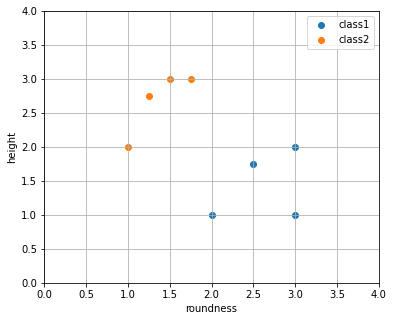

In [61]:
ub,lb = 0,4
x_p, y_p = class1[attributes[0]], class1[attributes[1]]
x_n, y_n = class2[attributes[0]], class2[attributes[1]]
# fig, ax = plt.subplots(figsize=(8,6))
plt.figure(figsize=(6,5))
plt.scatter(class1[attributes[0]],class1[attributes[1]], label='class1')
plt.scatter(class2[attributes[0]],class2[attributes[1]], label='class2')
plt.xlabel(attributes[0])
plt.ylabel(attributes[1])
plt.axis([ub, lb, ub, lb])
plt.grid()
plt.legend()
plt.show()

delta, yi, xi, b, a

In [62]:
delta = cp.Variable()
a = cp.Variable()
b = cp.Variable()

In [63]:
class1_ = class1.to_records(index=False).tolist()

class2_ = class2.to_records(index=False).tolist()
print(class1_); class2_

[(2.0, 1.0), (3.0, 2.0), (3.0, 1.0), (2.5, 1.75)]


[(1.0, 2.0), (1.5, 3.0), (1.75, 3.0), (1.25, 2.75)]

In [64]:
constraints = []
c1 = [i >= a*j + b + delta for (i,j) in class1_]
c2 = [i <= a*j + b - delta for (i,j) in class2_]
constraints += c1
constraints += c2

In [65]:
objective = cp.Maximize(delta)
prob = cp.Problem(objective, constraints)

In [66]:
result = prob.solve()
print("Optimal value is: ",result)

Optimal value is:  0.9999999999817593


In [67]:
print(delta.value, a.value, b.value)

0.9999999999817593 2.574402733633843 -3.1488054672664205


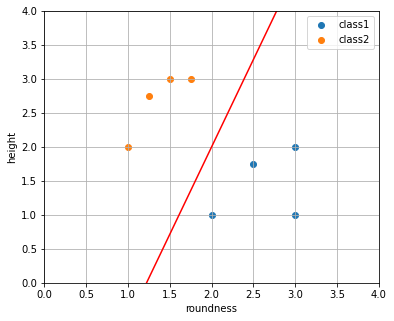

In [68]:
x = np.arange(5)

plt.figure(figsize=(6,5))
plt.scatter(x_p,y_p, label='class1')
plt.scatter(x_n,y_n, label='class2')
plt.plot(x, a.value * x + b.value, 'r')
plt.axis([ub, lb, ub, lb])

plt.xlabel(attributes[0])
plt.ylabel(attributes[1])
plt.legend()
plt.grid()
plt.show()

# cutting stock

(i) 97 rolls of width 135 cm <br/>
(ii) 610 rolls of width 108 cm <br/>
iii) 395 rolls of width 93 cm <br/>
(iv) 211 rolls of width 42 cm


• P1 : 2×135 <br/>
• P2 : 135+108+42 <br/>
• P3 : 135+93+42 <br/>
• P4 : 135+3*42 <br/>
• P5 : 2×108+2*42 <br/>
• P6 : 108+2*93 <br/>
• P7 : 108+93+2×42 <br/>
• P8 : 108+4*42 <br/>
• P9 : 3×93 <br/>
• P10 : 2×93+2×42 <br/>
• P11 : 93+4×42 <br/>
• P12 : 7×42

In [69]:
x1 = cp.Variable()
x2 = cp.Variable()
x3 = cp.Variable()
x4 = cp.Variable()
x5 = cp.Variable()
x6 = cp.Variable()
x7 = cp.Variable()
x8 = cp.Variable()
x9 = cp.Variable()
x10 = cp.Variable()
x11 = cp.Variable()
x12 = cp.Variable()

In [70]:
constraints = [2*x1 + x2 + x3 + x4 >= 97,\
               x2 + 2*x5 + x6 + x7 + x8 >= 610,\
               x3 + 2*x6 + x7 + 3*x9 + 2*x10 + x11 >= 395,\
               x2 + x3 + 3*x4 + 2*x5 + 2*x7 + 4*x8 + 2*x10 + 4*x11 + 7*x12 >= 211]

In [71]:
objective = cp.Minimize(30*x1 + 15*x2 + 30*x3 + 39*x4 + 0*x5 + \
                        6*x6 + 15*x7 + 24*x8 + 21*x9 + 30*x10 + 39*x11 + 6*x12)
prob = cp.Problem(objective, constraints)

In [72]:
result = prob.solve()
print("Solution is:", prob.status)
print(" Objective value is:", result)

Solution is: unbounded
 Objective value is: -inf


 cutting stock 2

In [73]:
x1 = cp.Variable()
x2 = cp.Variable()
x3 = cp.Variable()
x4 = cp.Variable()
x5 = cp.Variable()
x6 = cp.Variable()
x7 = cp.Variable()
x8 = cp.Variable()
x9 = cp.Variable()
x10 = cp.Variable()

In [74]:
constraints = [2*x1 + x5 + x6 + x7 >= 511,\
               2*x2 + x5 + x8 + x9 >= 301,\
               2*x3 + x6 + x8 + x10 >= 263,\
               x3 + 3*x4 + x7 + 2*x9 + 2*x10 >= 383]

In [75]:
objective = cp.Minimize(2*x1 + 4*x2 + 2*x4 + 3*x5 + \
                        4*x6 + 5*x7 + 5*x8 + 0*x9 + x10 )
prob = cp.Problem(objective, constraints)

In [76]:
result = prob.solve()
print("Solution is:", prob.status)
print(" Objective value is:", result)

Solution is: infeasible
 Objective value is: inf


In [77]:
X = cp.Variable(4,boolean=True)

In [78]:
constraints = [-5*X[3] - 5*X[2] - 3*X[0] - 6*X[1] >= -12,\
               X[3] + 2*X[2] - 4*X[0] - 9*X[1] >= -25,\
              ]

In [79]:
objective = cp.Minimize(-10*X[3] - 12*X[2] - 15*X[0] - 25*X[1])

In [80]:
problem = cp.Problem(objective, constraints)

In [81]:
result = problem.solve()
print("Solution is {}\nObjective Value is {}\nX: {}".format(problem.status, result, X.value))

Solution is optimal
Objective Value is -40.0
X: [1. 1. 0. 0.]


In [82]:
X = cp.Variable(4,boolean=True)
constraints = [5*X[3] + 5*X[2] + 3*X[0] + 6*X[1] <= 12,\
               X[3] - 2*X[2] + 4*X[0] + 9*X[1] <= 25,\
              ]
objective = cp.Maximize(10*X[3] + 12*X[2] + 15*X[0] + 25*X[1])
problem = cp.Problem(objective, constraints)
result = problem.solve()
print("Solution is {}\nObjective Value is {}\nX: {}".format(problem.status, result, X.value))

Solution is optimal
Objective Value is 40.0
X: [1. 1. 0. 0.]


In [83]:
X = cp.Variable(3)
constraints = [5*X[0] - 6*X[1] - X[2] <= -9,\
               -2*X[0] + X[1] + 4*X[2] == 3,\
               13*X[0] - 8*X[2] <=0, \
               X >= 0
              ]
objective = cp.Minimize(6*X[0] + 7*X[1] - 3*X[2])
problem = cp.Problem(objective, constraints)
result = problem.solve()
print("Solution is {}\nObjective Value is {}\nX: {}".format(problem.status, result, X.value))

Solution is optimal
Objective Value is 8.869565203226701
X: [-4.53882530e-10  1.43478261e+00  3.91304348e-01]


In [84]:
from fractions import Fraction
def add(a,b):
    c = a+b
    print (Fraction(c),c)

In [85]:
add(-6,-105/23)

-2973844319160409/281474976710656 -10.565217391304348
